#Check an ROI
Analyze and fix single ROI failures

In [1]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw972')) #P301_monthly/month09'))
from uw.like2 import process, main; reload(main); reload(process);

<module 'uw.like2.process' from '/afs/slac/g/glast/groups/catalog/pointlike/python/uw/like2/process.pyc'>

In [2]:
%time r = process.Process('.',  update_positions_flag=True, finish=True)#True)

Using configuration file "config.txt" in folder: /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw972/.
Opening dataset P301_6years from key in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py
invoking Data.setPhotonBinner for front/back event types...
Extracting DSS from existing binfile
GTI from binfile Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
Verified binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits
no header info in ltcube?
Accepting ltcube without DSS info since legacy specified
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
loading binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits ... found 162070183 photons in 40 bands, energies 10-1000000 MeV
dataset "P301_6years", found in /afs/slac/g/glast/groups/catalog//pointlike/fe

In [33]:
rois=[366 ]
r.setup_roi(rois[0])
r.summarize()

75 total sources: 0 extended, 3 global
current likelihood, est. diff to peak: 107266.2, 0.00
Name                  index     value  error(%)  gradient
P86Y3910_Norm             0 1.195e-14      27.3       0.1
        _Index            1     1.798      10.5       0.0
P86Y3873_Norm             2 5.173e-15      43.6       0.0
        _Index            3     1.836      17.6       0.0
P86Y3853_Norm             4 1.023e-13      89.9       0.0
        _Index            5     2.202      26.6       0.0
S970-202_Norm             6 7.561e-14      43.0       0.0
        _Index            7     2.412      14.1       0.0


In [34]:
r.localize('*202', update=True);

Failed localization for source S970-202: Poorly formed quadratic form


Failed localization for source S970-202: Poorly formed quadratic form
TSplot: filling 225 pixels (size=0.25, npix=15)...


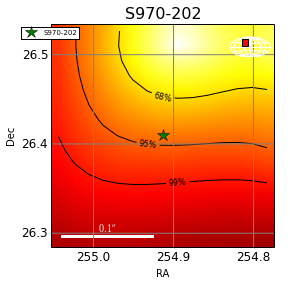

In [35]:
r.plot_tsmap();

In [36]:
r.del_source('*202')

uw.like2.sources.PointSource: 
	name  : S970-202
	skydir: SkyDir(254.815,26.498)
	model : LogParabola
		Norm      : (1 + 0.538 - 0.350) (avg = 0.434) 7.56e-14   
		Index     : (1 + 0.141 - 0.141) (avg = 0.141) 2.41       
		beta      : (1 + 0.000 - 0.000) (avg = 0.000) 0          (FROZEN)
		E_break   : (1 + 0.000 - 0.000) (avg = 0.000) 1.51e+03   (FROZEN)
		Ph. Flux  : (1 + 1.239 - 0.553) (avg = 0.828) 3.72e-09   (DERIVED)
		En. Flux  : (1 + 0.608 - 0.378) (avg = 0.480) 1.97e-12   (DERIVED)

In [37]:
r.fit()

11 calls, function value, improvement, quality: 107259.2, 2.64, 0.01
Name                  index     value  error(%)  gradient
P86Y3910_Norm             0   1.2e-14      27.3       0.2
        _Index            1     1.799      10.5      -0.0
P86Y3873_Norm             2 5.818e-15      40.3       0.4
        _Index            3     1.962      15.6       0.6
P86Y3853_Norm             4  1.92e-13      37.2       0.2
        _Index            5      2.57      12.5       0.3


2015-07-17 08:27:26 - HP12_0366 - interactive
---Updating positions---
name               TS    qual delta_ts
P86Y3910            67    0.7   0.0  SkyDir(258.161,29.566) -> SkyDir(258.161,29.566), moved 0.00
P86Y3873            24    0.2   0.0  SkyDir(255.570,26.734) -> SkyDir(255.570,26.734), moved 0.00
P86Y3853             9     TS<10
------------------------------------------------------------------------------------------ 
	 Nearby sources within 5.0 degrees before fit, logL=107259
name               dist        ra       dec        TS eflux(eV)    index   energy   beta/b
P86Y3873            1.2   255.570    26.734        27       1.0*    1.96*    4978     0
P86Y3853            2.2   254.606    25.987        20       1.3*    2.57*    1014     0
P86Y3910            2.8   258.161    29.566        67       1.8*    1.80*    4670     0
P86Y3893            3.0   256.756    30.082                 0.8     2.16     2096     0
P86Y3876            4.3   255.674    31.245                 2.8   

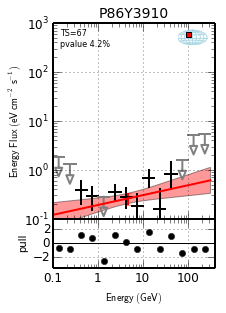

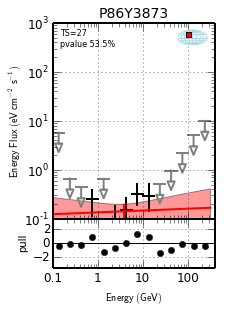

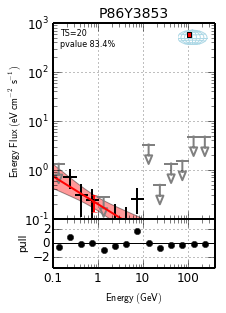

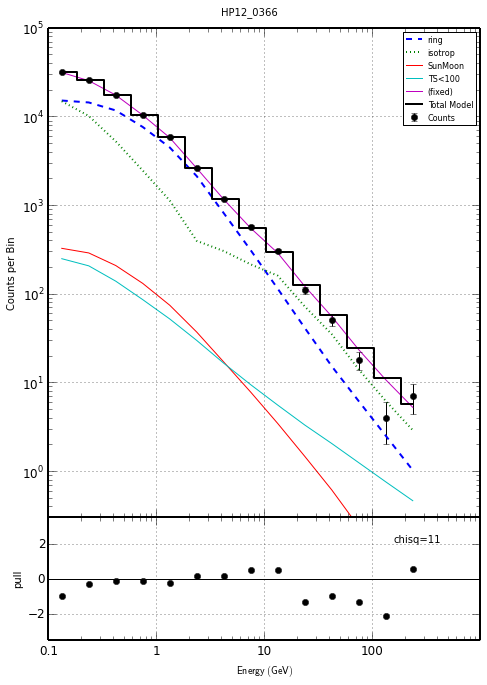

In [38]:
r.process()